<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
%pylab inline
import pandas as pd
import abra

# Data downloaded from Kaggle: https://www.kaggle.com/zhangluyuan/ab-testing
data = pd.read_csv('/tmp/ab_data.csv')
data.head()

Populating the interactive namespace from numpy and matplotlib


,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [2]:
# data.groupby(['landing_page', 'group']).count()

Populating the interactive namespace from numpy and matplotlib

Observations Summary:
+----------------+-----------------+------------------+
| Treatment      | control         | treatment        |
+----------------+-----------------+------------------+
| Metric         | converted       | converted        |
| Observations   | 14523           | 186              |
| Mean           | 0.1187          | 0.1344           |
| Standard Error | (0.1134, 0.124) | (0.0854, 0.1834) |
| Variance       | 0.1046          | 0.1163           |
+----------------+-----------------+------------------+

Test Results:
+----------------------+-----------------------+
| MeansDelta           | 0.0157                |
| MeansDelta CI        | (-0.0258, inf)        |
| CI %-tiles           | (0.0500, inf)         |
| MeansDelta-relative  | 13.23 %               |
| CI-relative          | (-21.72, inf) %       |
| Effect Size          | 0.0485                |
| alpha                | 0.0500                |
| P

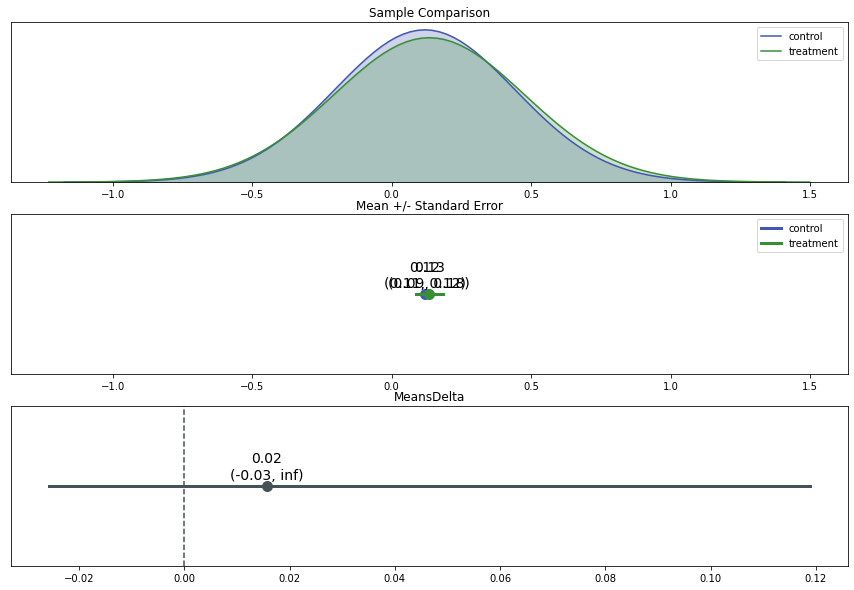

In [4]:
%pylab inline
from abra import Experiment, HypothesisTest

experiment = Experiment(
    data=data.sample(frac=.1),
    treatment='group',
    measures='converted',
    attributes=['landing_page'],
)

ab_test = abra.HypothesisTest(
    metric='converted',
    control='control',
    variation='treatment',
    hypothesis='larger',
    segmentation="landing_page == 'old_page'",
#     inference_method='gaussian'
    inference_method='means_delta'
#     inference_method='proportions_delta'
)

ab_results = experiment.run_test(ab_test)

ab_results.display()
ab_results.visualize()